<a href="https://colab.research.google.com/github/Dhanush-adk/intro_to_dl/blob/main/Assignment_1/Assignment_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [245]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)
np.random.seed(123)

In [246]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [247]:
url = 'https://raw.githubusercontent.com/Dhanush-adk/intro_to_dl/main/Assignment_1/house-train.csv'
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [248]:
df.shape

(1460, 81)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [250]:
df = df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [251]:
df_dtype = pd.DataFrame(df.dtypes,columns=['dtype'])
print(df_dtype.value_counts())
print(df_dtype)

dtype  
object     38
int64      35
float64     3
dtype: int64
                 dtype
Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
...                ...
MoSold           int64
YrSold           int64
SaleType        object
SaleCondition   object
SalePrice        int64

[76 rows x 1 columns]


In [252]:
usefull_cols = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF'
                , 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces'
                ,'LotFrontage','WoodDeckSF','OpenPorchSF'
                ,'ExterQual','Neighborhood','MSZoning'
                ,'LotShape','LandContour','Condition1','HouseStyle','MasVnrType','SaleCondition', 'SalePrice']
df_featured = df[usefull_cols].copy()

In [253]:
df_featured['GarageArea'] = df_featured['GarageArea'].fillna(df_featured['GarageArea'].mean())
df_featured['TotalBsmtSF'] = df_featured['TotalBsmtSF'].fillna(df_featured['TotalBsmtSF'].mean())

In [254]:
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   GrLivArea      1460 non-null   int64  
 2   GarageArea     1460 non-null   int64  
 3   TotalBsmtSF    1460 non-null   int64  
 4   FullBath       1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   Fireplaces     1460 non-null   int64  
 8   LotFrontage    1201 non-null   float64
 9   WoodDeckSF     1460 non-null   int64  
 10  OpenPorchSF    1460 non-null   int64  
 11  ExterQual      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  MSZoning       1460 non-null   object 
 14  LotShape       1460 non-null   object 
 15  LandContour    1460 non-null   object 
 16  Condition1     1460 non-null   object 
 17  HouseStyle     1460 non-null   object 
 18  MasVnrTy

In [255]:
df_featured['LotFrontage'] = df_featured['LotFrontage'].fillna(df_featured['LotFrontage'].mean())

In [256]:
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   GrLivArea      1460 non-null   int64  
 2   GarageArea     1460 non-null   int64  
 3   TotalBsmtSF    1460 non-null   int64  
 4   FullBath       1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   Fireplaces     1460 non-null   int64  
 8   LotFrontage    1460 non-null   float64
 9   WoodDeckSF     1460 non-null   int64  
 10  OpenPorchSF    1460 non-null   int64  
 11  ExterQual      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  MSZoning       1460 non-null   object 
 14  LotShape       1460 non-null   object 
 15  LandContour    1460 non-null   object 
 16  Condition1     1460 non-null   object 
 17  HouseStyle     1460 non-null   object 
 18  MasVnrTy

In [257]:
df_featured['MasVnrType'] = df_featured['MasVnrType'].fillna(df_featured['MasVnrType'].mode().iloc[0])

In [258]:
df_featured['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [259]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [260]:
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   GrLivArea      1460 non-null   int64  
 2   GarageArea     1460 non-null   int64  
 3   TotalBsmtSF    1460 non-null   int64  
 4   FullBath       1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   Fireplaces     1460 non-null   int64  
 8   LotFrontage    1460 non-null   float64
 9   WoodDeckSF     1460 non-null   int64  
 10  OpenPorchSF    1460 non-null   int64  
 11  ExterQual      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  MSZoning       1460 non-null   object 
 14  LotShape       1460 non-null   object 
 15  LandContour    1460 non-null   object 
 16  Condition1     1460 non-null   object 
 17  HouseStyle     1460 non-null   object 
 18  MasVnrTy

In [261]:
df_featured = df_featured.replace({True: 1, False: 0})

In [262]:
df_featured.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,LotFrontage,WoodDeckSF,...,ExterQual,Neighborhood,MSZoning,LotShape,LandContour,Condition1,HouseStyle,MasVnrType,SaleCondition,SalePrice
0,7,1710,548,856,2,2003,2003,0,65.0,0,...,Gd,CollgCr,RL,Reg,Lvl,Norm,2Story,BrkFace,Normal,208500
1,6,1262,460,1262,2,1976,1976,1,80.0,298,...,TA,Veenker,RL,Reg,Lvl,Feedr,1Story,None,Normal,181500
2,7,1786,608,920,2,2001,2002,1,68.0,0,...,Gd,CollgCr,RL,IR1,Lvl,Norm,2Story,BrkFace,Normal,223500
3,7,1717,642,756,1,1915,1970,1,60.0,0,...,TA,Crawfor,RL,IR1,Lvl,Norm,2Story,None,Abnorml,140000
4,8,2198,836,1145,2,2000,2000,1,84.0,192,...,Gd,NoRidge,RL,IR1,Lvl,Norm,2Story,BrkFace,Normal,250000


In [263]:
categorical_columns = df_featured.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['ExterQual',
 'Neighborhood',
 'MSZoning',
 'LotShape',
 'LandContour',
 'Condition1',
 'HouseStyle',
 'MasVnrType',
 'SaleCondition']

In [264]:
df_featured[categorical_columns] = df_featured[categorical_columns].apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'O' else x)
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   GrLivArea      1460 non-null   int64  
 2   GarageArea     1460 non-null   int64  
 3   TotalBsmtSF    1460 non-null   int64  
 4   FullBath       1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   Fireplaces     1460 non-null   int64  
 8   LotFrontage    1460 non-null   float64
 9   WoodDeckSF     1460 non-null   int64  
 10  OpenPorchSF    1460 non-null   int64  
 11  ExterQual      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  MSZoning       1460 non-null   int64  
 14  LotShape       1460 non-null   int64  
 15  LandContour    1460 non-null   int64  
 16  Condition1     1460 non-null   int64  
 17  HouseStyle     1460 non-null   int64  
 18  MasVnrTy

In [265]:
df_featured.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,LotFrontage,WoodDeckSF,...,ExterQual,Neighborhood,MSZoning,LotShape,LandContour,Condition1,HouseStyle,MasVnrType,SaleCondition,SalePrice
0,7,1710,548,856,2,2003,2003,0,65.0,0,...,2,5,3,3,3,2,5,1,4,208500
1,6,1262,460,1262,2,1976,1976,1,80.0,298,...,3,24,3,3,3,1,2,2,4,181500
2,7,1786,608,920,2,2001,2002,1,68.0,0,...,2,5,3,0,3,2,5,1,4,223500
3,7,1717,642,756,1,1915,1970,1,60.0,0,...,3,6,3,0,3,2,5,2,0,140000
4,8,2198,836,1145,2,2000,2000,1,84.0,192,...,2,15,3,0,3,2,5,1,4,250000


In [266]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()

In [267]:
df_featured_scaled = pd.DataFrame(scaler_x.fit_transform(df_featured), columns=df_featured.columns)

In [268]:
X = df_featured_scaled.drop(['SalePrice'], axis=1)
y = df_featured_scaled['SalePrice']

In [269]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [270]:
class RegressionNet(nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(20, 100)  # 6 input features
        self.fc2 = nn.Linear(100, 20)
        self.fc3 = nn.Linear(20, 1)  # Output layer with 2 units for width and height

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Model, loss function, and optimizer
# Initialize the network
model = RegressionNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [271]:

x_train = torch.tensor(X_train.values, dtype=torch.float)
x_test = torch.tensor(X_test.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.float)


In [272]:
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [273]:
test_dataset = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [274]:
train_loss_list = []
val_loss_list = []
num_epochs = 30
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear existing gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets)  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update model parameters
        train_loss += loss.item() * inputs.size(0)  # Accumulate the loss

    # Calculate average training loss
    train_loss /= len(train_loader.dataset)
    train_loss_list.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_total = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets)  # Compute loss
            val_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            val_total += ((outputs - targets) ** 2).sum().item()  # Accumulate squared errors

    # Calculate average validation loss (MSE) and RMSE
    val_loss /= len(test_loader.dataset)
    val_loss_list.append(val_loss)
    rmse = np.sqrt(val_total / len(test_loader.dataset))

    # Print training and validation results
    print(f'Epoch[{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation RMSE: {rmse:.4f}')


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, t

Epoch[1/30], Train Loss: 0.0593, Validation Loss: 0.0558, Validation RMSE: 1.3307
Epoch[2/30], Train Loss: 0.0488, Validation Loss: 0.0469, Validation RMSE: 1.2177
Epoch[3/30], Train Loss: 0.0407, Validation Loss: 0.0398, Validation RMSE: 1.1234
Epoch[4/30], Train Loss: 0.0344, Validation Loss: 0.0345, Validation RMSE: 1.0496
Epoch[5/30], Train Loss: 0.0295, Validation Loss: 0.0303, Validation RMSE: 0.9768
Epoch[6/30], Train Loss: 0.0257, Validation Loss: 0.0269, Validation RMSE: 0.9022
Epoch[7/30], Train Loss: 0.0227, Validation Loss: 0.0245, Validation RMSE: 0.8789
Epoch[8/30], Train Loss: 0.0203, Validation Loss: 0.0222, Validation RMSE: 0.8426
Epoch[9/30], Train Loss: 0.0184, Validation Loss: 0.0208, Validation RMSE: 0.8036
Epoch[10/30], Train Loss: 0.0170, Validation Loss: 0.0194, Validation RMSE: 0.7871
Epoch[11/30], Train Loss: 0.0159, Validation Loss: 0.0185, Validation RMSE: 0.7601
Epoch[12/30], Train Loss: 0.0151, Validation Loss: 0.0179, Validation RMSE: 0.7539
Epoch[13/30],

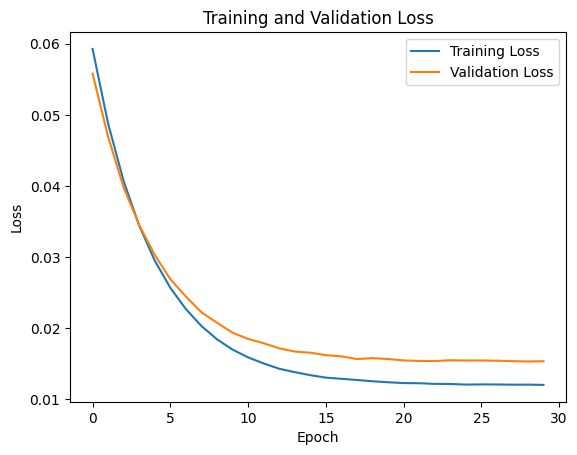

Final Validation RMSE: 0.7005


In [275]:
# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Print final RMSE
print(f'Final Validation RMSE: {rmse:.4f}')

In [276]:
total_params = sum(p.numel() for p in model.parameters())
print(f'Total number of parameters in the model: {total_params}')

Total number of parameters in the model: 4141


#2. b

In [368]:
df_featured = df[usefull_cols].copy()
df_featured.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,LotFrontage,WoodDeckSF,...,ExterQual,Neighborhood,MSZoning,LotShape,LandContour,Condition1,HouseStyle,MasVnrType,SaleCondition,SalePrice
0,7,1710,548,856,2,2003,2003,0,65.0,0,...,Gd,CollgCr,RL,Reg,Lvl,Norm,2Story,BrkFace,Normal,208500
1,6,1262,460,1262,2,1976,1976,1,80.0,298,...,TA,Veenker,RL,Reg,Lvl,Feedr,1Story,None,Normal,181500
2,7,1786,608,920,2,2001,2002,1,68.0,0,...,Gd,CollgCr,RL,IR1,Lvl,Norm,2Story,BrkFace,Normal,223500
3,7,1717,642,756,1,1915,1970,1,60.0,0,...,TA,Crawfor,RL,IR1,Lvl,Norm,2Story,None,Abnorml,140000
4,8,2198,836,1145,2,2000,2000,1,84.0,192,...,Gd,NoRidge,RL,IR1,Lvl,Norm,2Story,BrkFace,Normal,250000


In [369]:
df_featured['GarageArea'] = df_featured['GarageArea'].fillna(df_featured['GarageArea'].mean())
df_featured['TotalBsmtSF'] = df_featured['TotalBsmtSF'].fillna(df_featured['TotalBsmtSF'].mean())

In [370]:
df_featured = pd.get_dummies(df_featured, columns=['Neighborhood','MSZoning','LotShape','LandContour','Condition1','HouseStyle','MasVnrType','SaleCondition', 'ExterQual'])
df_featured.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,LotFrontage,WoodDeckSF,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,7,1710,548,856,2,2003,2003,0,65.0,0,...,0,0,0,0,1,0,0,0,1,0
1,6,1262,460,1262,2,1976,1976,1,80.0,298,...,0,0,0,0,1,0,0,0,0,1
2,7,1786,608,920,2,2001,2002,1,68.0,0,...,0,0,0,0,1,0,0,0,1,0
3,7,1717,642,756,1,1915,1970,1,60.0,0,...,1,0,0,0,0,0,0,0,0,1
4,8,2198,836,1145,2,2000,2000,1,84.0,192,...,0,0,0,0,1,0,0,0,1,0


In [371]:
df_featured = df_featured.replace({True: 1, False: 0})
# Convert all columns to numeric (float) and handle NaN values
df_featured = df_featured.apply(pd.to_numeric, errors='coerce').fillna(0)


In [372]:
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OverallQual            1460 non-null   int64  
 1   GrLivArea              1460 non-null   int64  
 2   GarageArea             1460 non-null   int64  
 3   TotalBsmtSF            1460 non-null   int64  
 4   FullBath               1460 non-null   int64  
 5   YearBuilt              1460 non-null   int64  
 6   YearRemodAdd           1460 non-null   int64  
 7   Fireplaces             1460 non-null   int64  
 8   LotFrontage            1460 non-null   float64
 9   WoodDeckSF             1460 non-null   int64  
 10  OpenPorchSF            1460 non-null   int64  
 11  SalePrice              1460 non-null   int64  
 12  Neighborhood_Blmngtn   1460 non-null   uint8  
 13  Neighborhood_Blueste   1460 non-null   uint8  
 14  Neighborhood_BrDale    1460 non-null   uint8  
 15  Neig

In [373]:
X = df_featured.drop(['SalePrice'], axis=1)
y = df_featured[['SalePrice']]

In [374]:
X

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,LotFrontage,WoodDeckSF,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,7,1710,548,856,2,2003,2003,0,65.0,0,...,0,0,0,0,1,0,0,0,1,0
1,6,1262,460,1262,2,1976,1976,1,80.0,298,...,0,0,0,0,1,0,0,0,0,1
2,7,1786,608,920,2,2001,2002,1,68.0,0,...,0,0,0,0,1,0,0,0,1,0
3,7,1717,642,756,1,1915,1970,1,60.0,0,...,1,0,0,0,0,0,0,0,0,1
4,8,2198,836,1145,2,2000,2000,1,84.0,192,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,460,953,2,1999,2000,1,62.0,0,...,0,0,0,0,1,0,0,0,0,1
1456,6,2073,500,1542,2,1978,1988,2,85.0,349,...,0,0,0,0,1,0,0,0,0,1
1457,7,2340,252,1152,2,1941,2006,2,66.0,0,...,0,0,0,0,1,0,1,0,0,0
1458,5,1078,240,1078,1,1950,1996,0,68.0,366,...,0,0,0,0,1,0,0,0,0,1


In [405]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [406]:
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [407]:
x_train = torch.tensor(X_train, dtype=torch.float)
x_test = torch.tensor(X_test, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.float)

In [408]:
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [409]:
test_dataset = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [391]:
X_train.shape

(1168, 80)

In [448]:
class RegressionNet(nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(80, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x


# Model, loss function, and optimizer
# Initialize the network
model = RegressionNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [449]:
model.to(device)

RegressionNet(
  (fc1): Linear(in_features=80, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
)

In [450]:
train_loss_list = []
val_loss_list = []
num_epochs = 10000
for epoch in range(num_epochs+1):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets)  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update model parameters
        train_loss += loss.item() * inputs.size(0)  # Accumulate the loss
        break
    # Calculate average training loss
    train_loss /= len(train_loader.dataset)
    train_loss_list.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_total = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets)  # Compute loss
            val_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            val_total += ((outputs - targets) ** 2).sum().item()  # Accumulate squared errors

    # Calculate average validation loss (MSE) and RMSE
    val_loss /= len(test_loader.dataset)
    val_loss_list.append(val_loss)
    rmse = np.sqrt(val_total / len(test_loader.dataset))

    # Print training and validation results
    if epoch % 100 == 0:
      print(f'Epoch[{epoch}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation RMSE: {rmse:.4f}')

Epoch[0/10000], Train Loss: 1180411988.1644, Validation Loss: 39654006222.9041, Validation RMSE: 199133.1369
Epoch[100/10000], Train Loss: 1308003847.0137, Validation Loss: 38784680665.4247, Validation RMSE: 196938.2661
Epoch[200/10000], Train Loss: 511939289.4247, Validation Loss: 18949773143.6712, Validation RMSE: 137658.1750
Epoch[300/10000], Train Loss: 149726250.0822, Validation Loss: 6316152888.1096, Validation RMSE: 79474.2278
Epoch[400/10000], Train Loss: 69014086.1370, Validation Loss: 3125269467.1781, Validation RMSE: 55904.1096
Epoch[500/10000], Train Loss: 38797203.2877, Validation Loss: 2008249505.3151, Validation RMSE: 44813.4969
Epoch[600/10000], Train Loss: 118920220.0548, Validation Loss: 1733626895.7808, Validation RMSE: 41636.8454
Epoch[700/10000], Train Loss: 29476162.6301, Validation Loss: 1648406217.2055, Validation RMSE: 40600.5692
Epoch[800/10000], Train Loss: 24453109.4795, Validation Loss: 1474654965.9178, Validation RMSE: 38401.2365
Epoch[900/10000], Train Lo

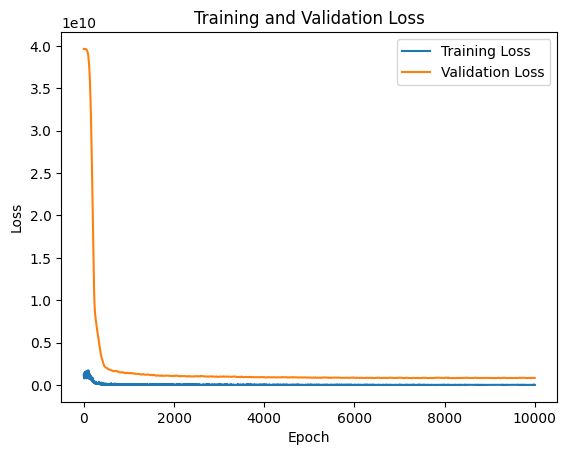

Final Validation RMSE: 28768.0635


In [451]:
# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Print final RMSE
print(f'Final Validation RMSE: {rmse:.4f}')

In [452]:
total_params = sum(p.numel() for p in model.parameters())
print(f'Total number of parameters in the model: {total_params}')

Total number of parameters in the model: 57793


# 2.C

In [463]:
class RegressionNet(nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(80, 2048)
        self.fc2 = nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024, 256)
        self.fc4 = nn.Linear(256, 32)
        self.fc5 = nn.Linear(32, 4)
        self.fc6 = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x


# Model, loss function, and optimizer
# Initialize the network
model = RegressionNet()
model.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [464]:
train_loss_list = []
val_loss_list = []
num_epochs = 10000
for epoch in range(num_epochs+1):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets)  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update model parameters
        train_loss += loss.item() * inputs.size(0)  # Accumulate the loss
        break
    # Calculate average training loss
    train_loss /= len(train_loader.dataset)
    train_loss_list.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_total = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets)  # Compute loss
            val_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            val_total += ((outputs - targets) ** 2).sum().item()  # Accumulate squared errors

    # Calculate average validation loss (MSE) and RMSE
    val_loss /= len(test_loader.dataset)
    val_loss_list.append(val_loss)
    rmse = np.sqrt(val_total / len(test_loader.dataset))

    # Print training and validation results
    if epoch % 100 == 0:
      print(f'Epoch[{epoch}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation RMSE: {rmse:.4f}')

Epoch[0/10000], Train Loss: 1487709843.2877, Validation Loss: 39653855189.9178, Validation RMSE: 199132.7577
Epoch[100/10000], Train Loss: 109208113.0959, Validation Loss: 2625313258.9589, Validation RMSE: 51237.8108
Epoch[200/10000], Train Loss: 24025701.6986, Validation Loss: 1261955352.5479, Validation RMSE: 35524.0109
Epoch[300/10000], Train Loss: 8121829.6986, Validation Loss: 1115496988.9315, Validation RMSE: 33399.0567
Epoch[400/10000], Train Loss: 20478684.9315, Validation Loss: 1122264408.7671, Validation RMSE: 33500.2151
Epoch[500/10000], Train Loss: 5291425.3151, Validation Loss: 1079254634.0822, Validation RMSE: 32852.0111
Epoch[600/10000], Train Loss: 15144568.9863, Validation Loss: 1044439587.0685, Validation RMSE: 32317.7906
Epoch[700/10000], Train Loss: 12152046.4658, Validation Loss: 982550414.0274, Validation RMSE: 31345.6602
Epoch[800/10000], Train Loss: 6478267.1781, Validation Loss: 988873280.8767, Validation RMSE: 31446.3556
Epoch[900/10000], Train Loss: 3614249.2

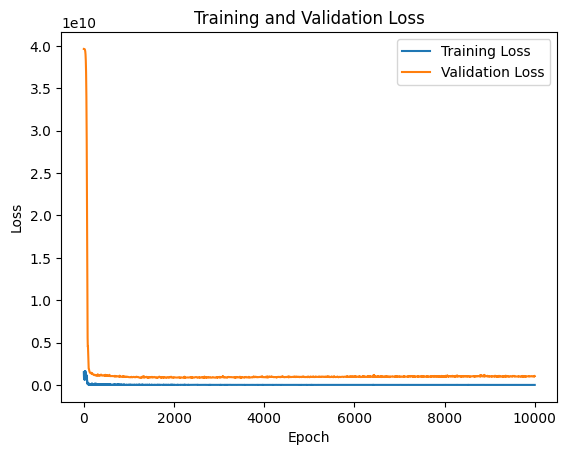

Final Validation RMSE: 32336.6713


In [465]:
# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Print final RMSE
print(f'Final Validation RMSE: {rmse:.4f}')

In [466]:
total_params = sum(p.numel() for p in model.parameters())
print(f'Total number of parameters in the model: {total_params}')

Total number of parameters in the model: 2534825
